In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\ASUS\Downloads\\StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
categorical_cols = df.select_dtypes(include='object').columns

In [7]:
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [8]:
for i in categorical_cols:
  print(df[i].unique())
  #Tell us the uniques value of the dataset

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [9]:
df.isnull().sum()
#This help to know that we don't have any null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

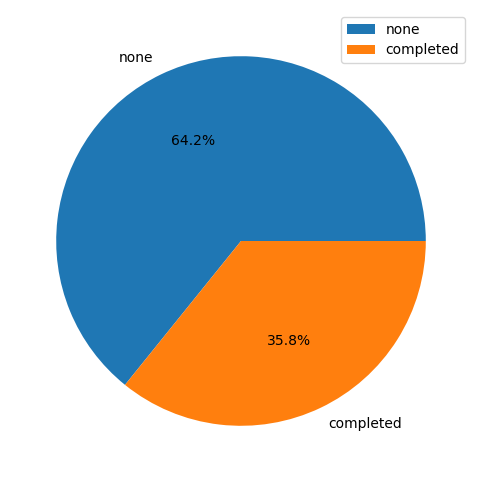

In [10]:
#How many student take preparatory class or not
count_test = df['test preparation course'].value_counts()
labels = df['test preparation course'].value_counts().index
#taking the index of that
plt.figure(figsize=(6,6))
plt.pie(count_test,labels=labels,autopct='%1.1f%%')
plt.legend(labels)
#legend help to show which color which labels
plt.show()

In [11]:
df['average_score']=(df['math score']+df['reading score']+df['writing score'])/3

In [12]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<Axes: xlabel='average_score', ylabel='math score'>

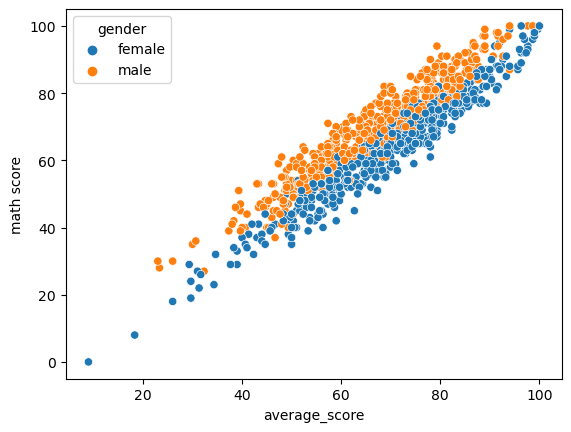

In [13]:
#Student performance in subjects based on gender
sns.scatterplot(x=df['average_score'],y=df['math score'],hue=df['gender'])

<Axes: xlabel='average_score', ylabel='reading score'>

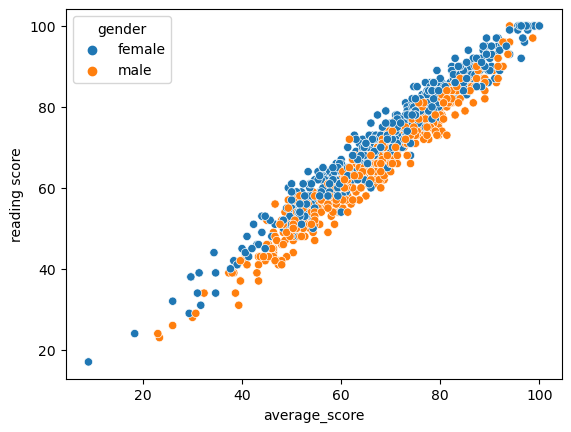

In [14]:
sns.scatterplot(x=df['average_score'],y=df['reading score'],hue=df['gender'])

<Axes: xlabel='average_score', ylabel='writing score'>

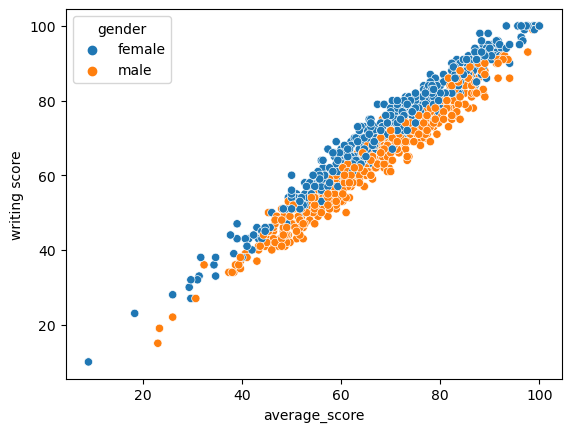

In [15]:
sns.scatterplot(x=df['average_score'],y=df['writing score'],hue=df['gender'])

In [16]:
gender={
    'male':1,
    'female':0
}

In [17]:
race={
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4,
}

In [18]:
df['gender']=df['gender'].map(gender)
df['race/ethnicity']=df['race/ethnicity'].map(race)
#map() is used to change the value in the original dataframe

In [19]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,bachelor's degree,standard,none,72,72,74,72.666667
1,0,2,some college,standard,completed,69,90,88,82.333333
2,0,1,master's degree,standard,none,90,95,93,92.666667
3,1,0,associate's degree,free/reduced,none,47,57,44,49.333333
4,1,2,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,master's degree,standard,completed,88,99,95,94.000000
996,1,2,high school,free/reduced,none,62,55,55,57.333333
997,0,2,high school,free/reduced,completed,59,71,65,65.000000
998,0,3,some college,standard,completed,68,78,77,74.333333


In [20]:
lu = { 
    'standard':1,
    'free/reduced':0
}

In [21]:
df['lunch']=df['lunch'].map(lu)

In [22]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,bachelor's degree,1,none,72,72,74,72.666667
1,0,2,some college,1,completed,69,90,88,82.333333
2,0,1,master's degree,1,none,90,95,93,92.666667
3,1,0,associate's degree,0,none,47,57,44,49.333333
4,1,2,some college,1,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,master's degree,1,completed,88,99,95,94.000000
996,1,2,high school,0,none,62,55,55,57.333333
997,0,2,high school,0,completed,59,71,65,65.000000
998,0,3,some college,1,completed,68,78,77,74.333333


In [23]:
tpc ={
    'none':0,
    'completed':1
}

In [24]:
df['test preparation course']=df['test preparation course'].map(tpc)

In [25]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,bachelor's degree,1,0,72,72,74,72.666667
1,0,2,some college,1,1,69,90,88,82.333333
2,0,1,master's degree,1,0,90,95,93,92.666667
3,1,0,associate's degree,0,0,47,57,44,49.333333
4,1,2,some college,1,0,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,master's degree,1,1,88,99,95,94.000000
996,1,2,high school,0,0,62,55,55,57.333333
997,0,2,high school,0,1,59,71,65,65.000000
998,0,3,some college,1,1,68,78,77,74.333333


In [26]:
level = {
    "bachelor's degree" :0,
    "some college" :1,
    "master's degree" :2,
    "associate's degree" :3,
    "high school" :4,
    "some high school" :5
}

In [27]:
df['parental level of education']=df['parental level of education'].map(level)

In [28]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,0,1,0,72,72,74,72.666667
1,0,2,1,1,1,69,90,88,82.333333
2,0,1,2,1,0,90,95,93,92.666667
3,1,0,3,0,0,47,57,44,49.333333
4,1,2,1,1,0,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,2,1,1,88,99,95,94.000000
996,1,2,4,0,0,62,55,55,57.333333
997,0,2,4,0,1,59,71,65,65.000000
998,0,3,1,1,1,68,78,77,74.333333


In [29]:
pd.get_dummies(df,drop_first=True)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,0,1,0,72,72,74,72.666667
1,0,2,1,1,1,69,90,88,82.333333
2,0,1,2,1,0,90,95,93,92.666667
3,1,0,3,0,0,47,57,44,49.333333
4,1,2,1,1,0,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,2,1,1,88,99,95,94.000000
996,1,2,4,0,0,62,55,55,57.333333
997,0,2,4,0,1,59,71,65,65.000000
998,0,3,1,1,1,68,78,77,74.333333


In [30]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,0,1,0,72,72,74,72.666667
1,0,2,1,1,1,69,90,88,82.333333
2,0,1,2,1,0,90,95,93,92.666667
3,1,0,3,0,0,47,57,44,49.333333
4,1,2,1,1,0,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,2,1,1,88,99,95,94.000000
996,1,2,4,0,0,62,55,55,57.333333
997,0,2,4,0,1,59,71,65,65.000000
998,0,3,1,1,1,68,78,77,74.333333


In [31]:
pd.get_dummies(df,drop_first=True)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,0,1,0,72,72,74,72.666667
1,0,2,1,1,1,69,90,88,82.333333
2,0,1,2,1,0,90,95,93,92.666667
3,1,0,3,0,0,47,57,44,49.333333
4,1,2,1,1,0,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,2,1,1,88,99,95,94.000000
996,1,2,4,0,0,62,55,55,57.333333
997,0,2,4,0,1,59,71,65,65.000000
998,0,3,1,1,1,68,78,77,74.333333


In [32]:
x=df.drop(columns='average_score').values

In [33]:
x

array([[ 0,  1,  0, ..., 72, 72, 74],
       [ 0,  2,  1, ..., 69, 90, 88],
       [ 0,  1,  2, ..., 90, 95, 93],
       ...,
       [ 0,  2,  4, ..., 59, 71, 65],
       [ 0,  3,  1, ..., 68, 78, 77],
       [ 0,  3,  1, ..., 77, 86, 86]], dtype=int64)

In [34]:
y=df['average_score'].values

In [35]:
y

array([ 72.66666667,  82.33333333,  92.66666667,  49.33333333,
        76.33333333,  77.33333333,  91.66666667,  40.66666667,
        65.        ,  49.33333333,  54.66666667,  45.        ,
        73.        ,  73.33333333,  53.66666667,  74.        ,
        87.66666667,  26.        ,  44.66666667,  57.66666667,
        66.        ,  70.        ,  50.33333333,  71.66666667,
        75.        ,  73.        ,  59.33333333,  70.33333333,
        68.33333333,  69.        ,  72.33333333,  63.        ,
        64.33333333,  40.        ,  88.66666667,  80.33333333,
        79.33333333,  57.66666667,  84.33333333,  56.66666667,
        56.66666667,  66.33333333,  58.66666667,  63.33333333,
        53.33333333,  58.66666667,  60.66666667,  71.        ,
        69.        ,  82.66666667,  52.        ,  71.33333333,
        46.33333333,  80.33333333,  80.66666667,  39.        ,
        84.33333333,  52.        ,  58.33333333,   9.        ,
        75.        ,  37.33333333,  59.33333333,  73.33

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train , y_test=train_test_split(x,y,test_size=0.2)

In [38]:
len(x_train)

800

In [39]:
x_train

array([[ 0,  3,  1, ..., 65, 81, 77],
       [ 0,  2,  5, ..., 43, 53, 53],
       [ 0,  2,  0, ..., 51, 72, 79],
       ...,
       [ 0,  3,  0, ..., 71, 76, 83],
       [ 1,  4,  4, ..., 94, 73, 71],
       [ 1,  3,  1, ..., 40, 42, 38]], dtype=int64)

In [40]:
len(x_test)

200

In [41]:
x_test

array([[ 0,  0,  0, ..., 45, 59, 64],
       [ 0,  3,  1, ..., 58, 67, 62],
       [ 1,  3,  0, ..., 75, 73, 74],
       ...,
       [ 0,  2,  1, ..., 63, 73, 71],
       [ 0,  2,  4, ..., 66, 71, 76],
       [ 1,  1,  1, ..., 47, 43, 41]], dtype=int64)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model=RandomForestRegressor(random_state=42)

In [44]:
nmodel=model.fit(x_train,y_train)

In [45]:
y_pre=nmodel.predict(x_test)

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_pre,y_test)

0.9976002795613973